## 数据导入

### EDA 探索性数据分析

In [5]:
data_train = pd.read_csv('../Datasets/titanic/train.csv')
data_test = pd.read_csv('../Datasets/titanic/test.csv')

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 查看乘客属性分布

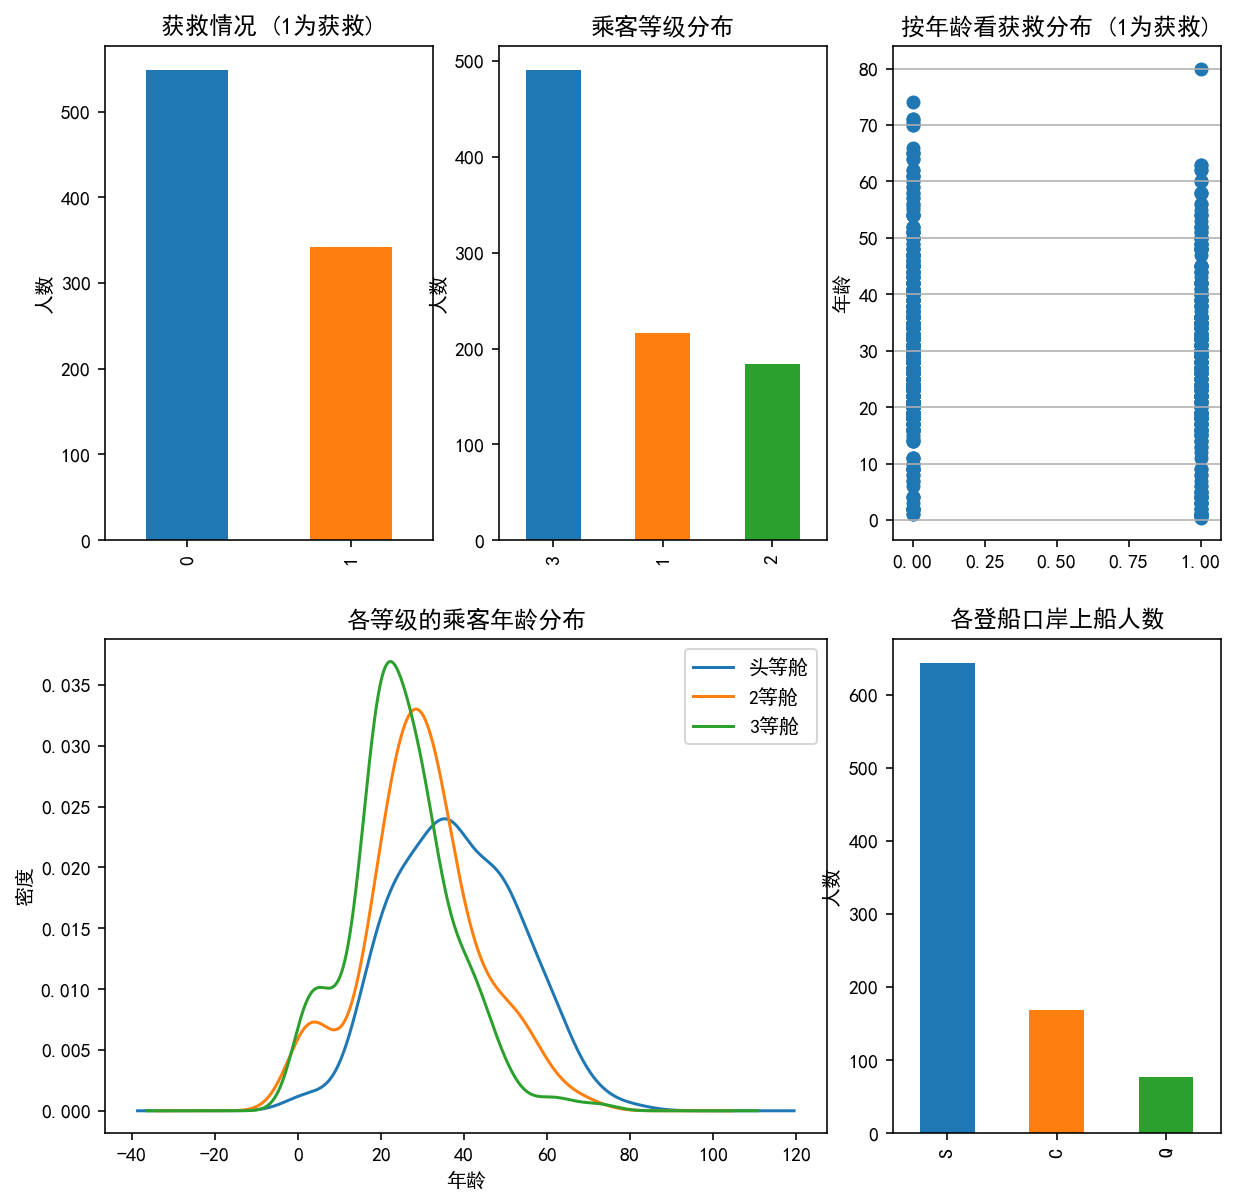

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

fig = plt.figure(figsize=(10, 10))
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

plt.subplot2grid((2, 3), (0, 0))  # 在一张大图里分列几个小图
data_train.Survived.value_counts().plot(kind='bar')  # 柱状图
plt.title(u"获救情况 (1为获救)")  # 标题
plt.ylabel(u"人数")

plt.subplot2grid((2, 3), (0, 1))
data_train.Pclass.value_counts().plot(kind="bar")
plt.ylabel(u"人数")
plt.title(u"乘客等级分布")

plt.subplot2grid((2, 3), (0, 2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel(u"年龄")  # 设定纵坐标名称
plt.grid(b=True, which='major', axis='y')
plt.title(u"按年龄看获救分布 (1为获救)")

plt.subplot2grid((2, 3), (1, 0), colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind='kde')
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"年龄")  # plots an axis lable
plt.ylabel(u"密度")
plt.title(u"各等级的乘客年龄分布")
plt.legend(
    (u'头等舱', u'2等舱', u'3等舱'), loc='best')  # sets our legend for our graph.

plt.subplot2grid((2, 3), (1, 2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title(u"各登船口岸上船人数")
plt.ylabel(u"人数")
plt.show()

<Figure size 432x288 with 0 Axes>

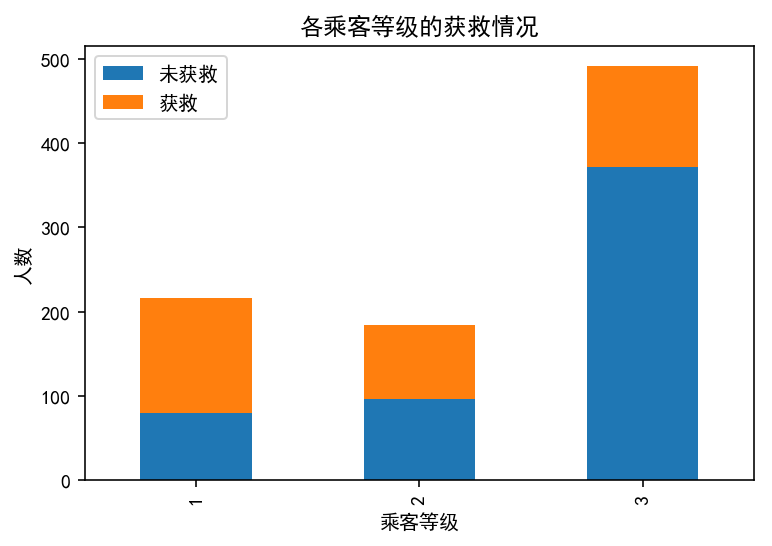

In [13]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df = pd.DataFrame({'未获救': Survived_0, '获救': Survived_1})
df.plot(kind='bar', stacked=True)
plt.title("各乘客等级的获救情况")
plt.xlabel("乘客等级")
plt.ylabel("人数")
plt.show()

明显等级为 1 的乘客，获救的概率高很多。恩，这个一定是影响最后获救结果的一个特征。

看看各性别的获救情况

<Figure size 432x288 with 0 Axes>

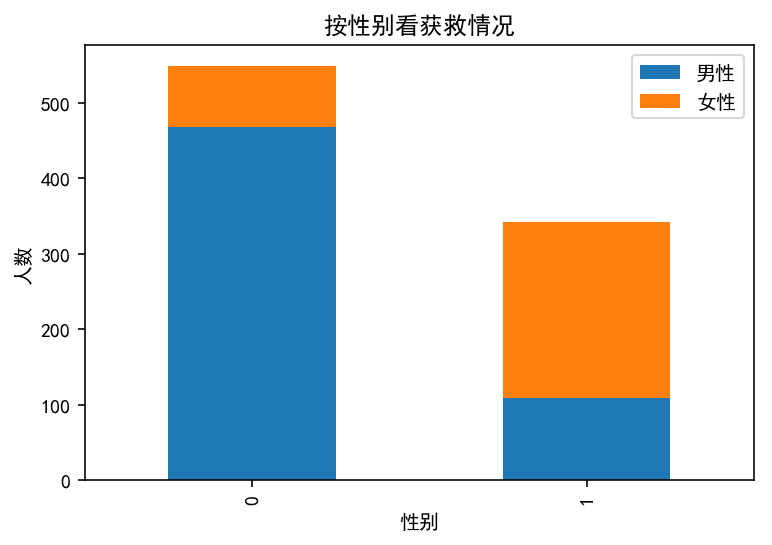

In [20]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df = pd.DataFrame({'男性': Survived_m, '女性': Survived_f})

# print(df)
df.plot(kind='bar', stacked=True)
plt.title("按性别看获救情况")
plt.xlabel("性别")
plt.ylabel("人数")
plt.show()

Survived 是幸存的意思，1 表示幸存，0 表示罹难。上面这张图表示，罹难的人中，男性占多数。幸存的人中，女性占多数，所以，性别是重要指标。

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


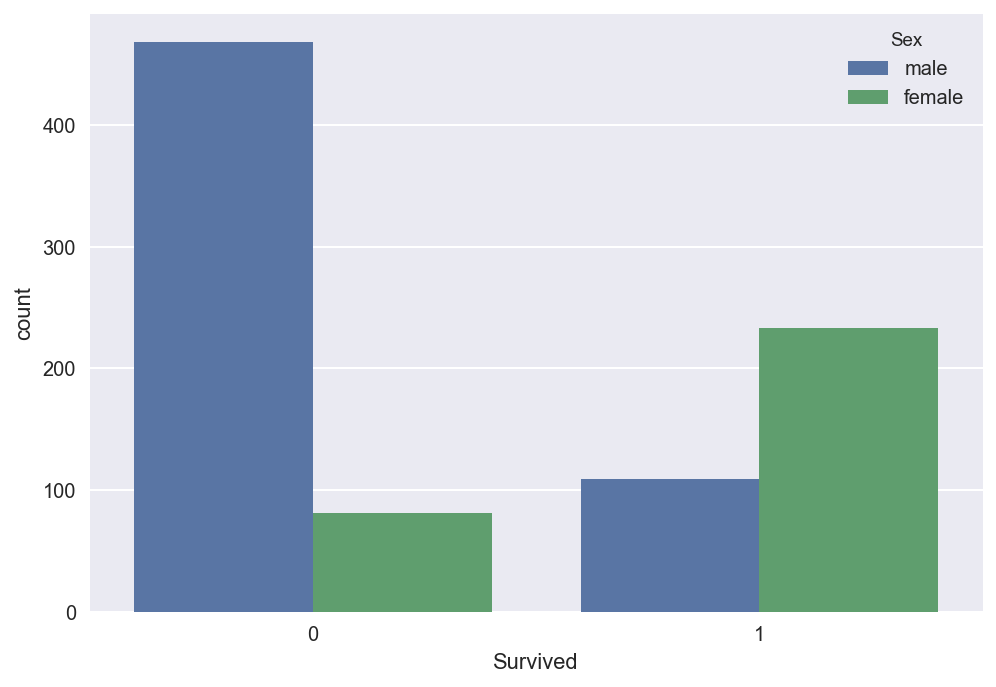

In [25]:
import seaborn as sns

sns.countplot(x='Survived', data=data_train, hue='Sex')

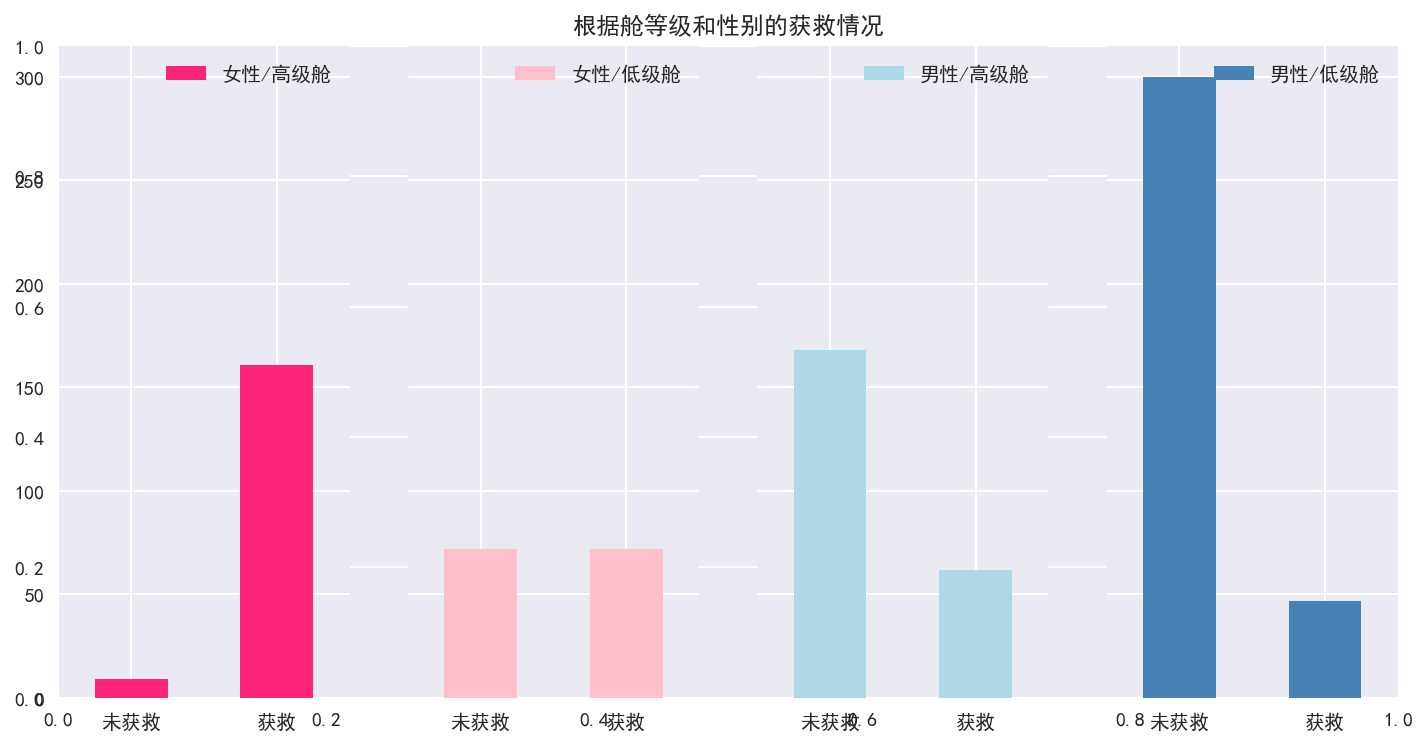

In [30]:
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

#然后我们再来看看各种舱级别情况下各性别的获救情况
fig = plt.figure(figsize=(12, 6))
fig.set(alpha=0.65)  # 设置图像透明度，无所谓
plt.title("根据舱等级和性别的获救情况")

ax1 = fig.add_subplot(141)
data_train.Survived[data_train.Sex == 'female'][
    data_train.Pclass != 3].value_counts().sort_index().plot(
        kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticks([0, 1])
ax1.set_xticklabels(["未获救", "获救"], rotation=0)
ax1.legend(["女性/高级舱"], loc='best')

ax2 = fig.add_subplot(142, sharey=ax1)
data_train.Survived[data_train.Sex == 'female'][
    data_train.Pclass == 3].value_counts().sort_index().plot(
        kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels(["未获救", u"获救"], rotation=0)
plt.legend(["女性/低级舱"], loc='best')

ax3 = fig.add_subplot(143, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][
    data_train.Pclass != 3].value_counts().sort_index().plot(
        kind='bar', label='male, high class', color='lightblue')
ax3.set_xticklabels(["未获救", "获救"], rotation=0)
plt.legend(["男性/高级舱"], loc='best')

ax4 = fig.add_subplot(144, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][
    data_train.Pclass == 3].value_counts().sort_index().plot(
        kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels(["未获救", "获救"], rotation=0)
plt.legend(["男性/低级舱"], loc='best')

plt.show()

各登船港口的获救情况

<Figure size 576x396 with 0 Axes>

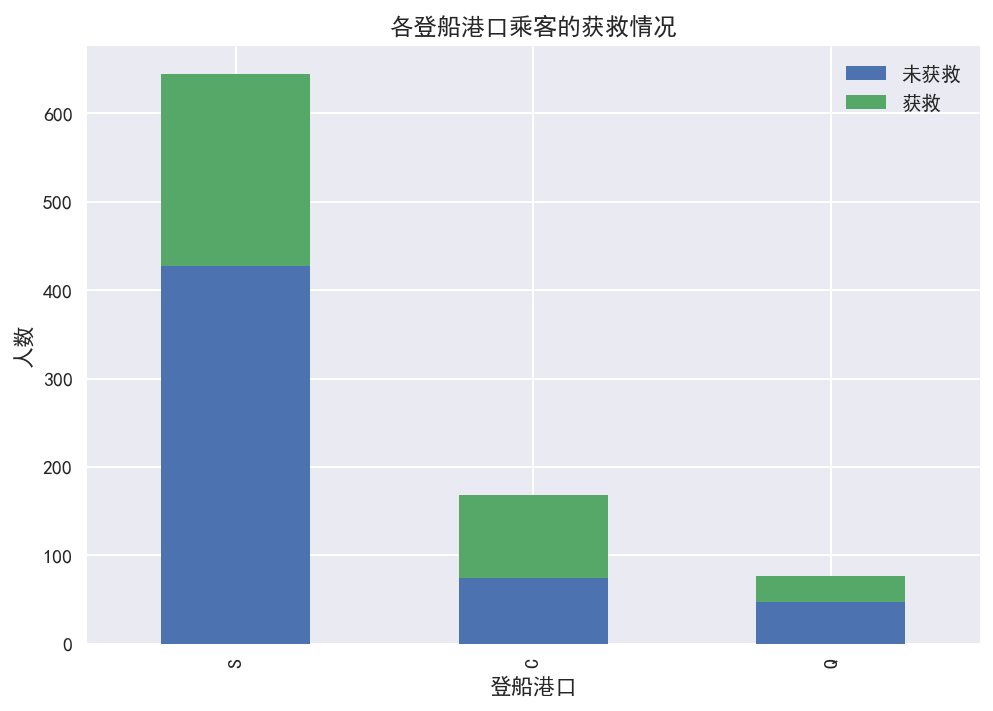

In [31]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df = pd.DataFrame({u'未获救': Survived_0, u'获救': Survived_1})
df.plot(kind='bar', stacked=True)
plt.title(u"各登船港口乘客的获救情况")
plt.xlabel(u"登船港口")
plt.ylabel(u"人数")

plt.show()

堂兄弟/妹，孩子/父母有几人，对是否获救的影响

In [34]:
gg = data_train.groupby(['SibSp','Survived'])
df = pd.DataFrame(gg.count()['PassengerId'])
print(df)

                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7


In [35]:
gp = data_train.groupby(['Parch','Survived'])
df = pd.DataFrame(gp.count()['PassengerId'])
print(df)

                PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1


In [37]:
# ticket是船票编号，应该是 unique 的，和最后的结果没有太大的关系，先不纳入考虑的特征范畴
data_train.Cabin.value_counts()

B96 B98            4
C23 C25 C27        4
G6                 4
D                  3
F33                3
F2                 3
E101               3
C22 C26            3
D36                2
C83                2
D33                2
E33                2
D17                2
C125               2
E67                2
B22                2
B49                2
B51 B53 B55        2
D26                2
B20                2
B57 B59 B63 B66    2
C52                2
B5                 2
C93                2
B35                2
B18                2
F4                 2
B28                2
C68                2
E121               2
                  ..
D37                1
B80                1
C110               1
D47                1
E63                1
C91                1
B42                1
D7                 1
C7                 1
C86                1
E40                1
D46                1
C47                1
A19                1
A5                 1
B30                1
D15          

<Figure size 576x396 with 0 Axes>

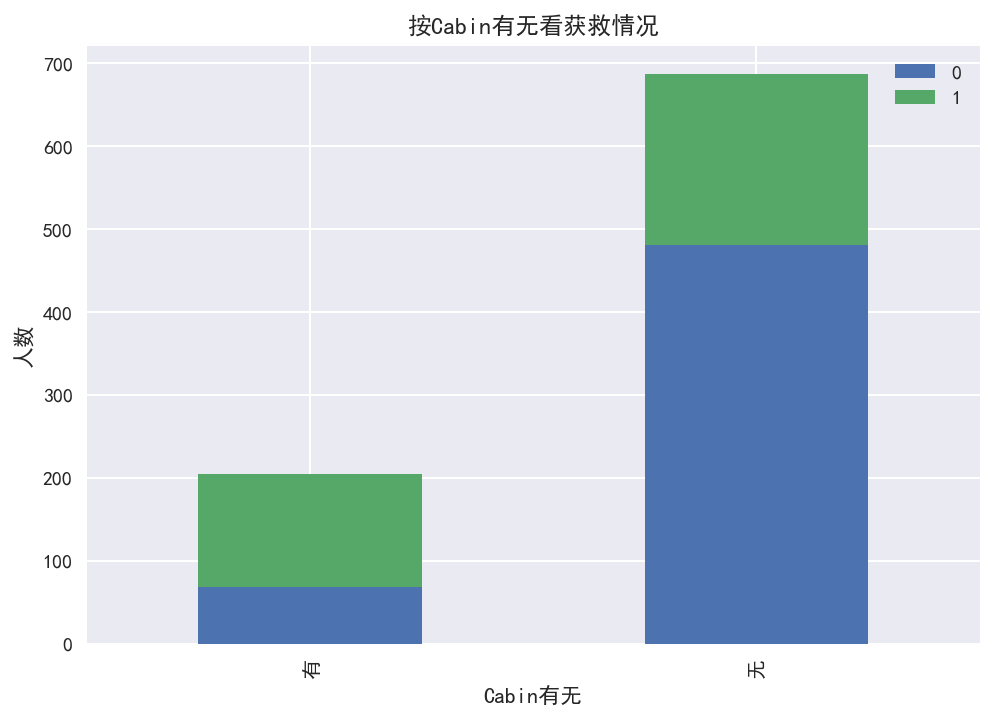

In [38]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_cabin = data_train.Survived[pd.notnull(
    data_train.Cabin)].value_counts()
Survived_nocabin = data_train.Survived[pd.isnull(
    data_train.Cabin)].value_counts()
df = pd.DataFrame({'有': Survived_cabin, '无': Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"按Cabin有无看获救情况")
plt.xlabel(u"Cabin有无")
plt.ylabel(u"人数")
plt.show()

有 Cabin 记录的似乎获救概率稍高一些。

## 简单数据预处理

先说Cabin，暂时我们就按照刚才说的，按Cabin有无数据，将这个属性处理成Yes和No两种类型吧。

再说Age：

通常遇到缺值的情况，我们会有几种常见的处理方式

如果缺值的样本占总数比例极高，我们可能就直接舍弃了，作为特征加入的话，可能反倒带入noise，影响最后的结果了
如果缺值的样本适中，而该属性非连续值特征属性(比如说类目属性)，那就把NaN作为一个新类别，加到类别特征中
如果缺值的样本适中，而该属性为连续值特征属性，有时候我们会考虑给定一个step(比如这里的age，我们可以考虑每隔2/3岁为一个步长)，然后把它离散化，之后把NaN作为一个type加到属性类目中。
有些情况下，缺失的值个数并不是特别多，那我们也可以试着根据已有的值，拟合一下数据，补充上。
本例中，后两种处理方式应该都是可行的，我们先试试拟合补全吧(虽然说没有特别多的背景可供我们拟合，这不一定是一个多么好的选择)

我们这里用scikit-learn中的RandomForest来拟合一下缺失的年龄数据(注：RandomForest是一个用在原始数据中做不同采样，建立多颗DecisionTree，再进行average等等来降低过拟合现象，提高结果的机器学习算法，我们之后会介绍到)

In [39]:
from sklearn.ensemble import RandomForestRegressor


### 使用 RandomForestClassifier 填补缺失的年龄属性
def set_missing_ages(df):

    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']]

    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()

    # y即目标年龄
    y = known_age[:, 0]

    # X即特征属性值
    X = known_age[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)

    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1::])

    # 用得到的预测结果填补原缺失数据
    df.loc[(df.Age.isnull()), 'Age'] = predictedAges

    return df, rfr


def set_Cabin_type(df):
    df.loc[(df.Cabin.notnull()), 'Cabin'] = "Yes"
    df.loc[(df.Cabin.isnull()), 'Cabin'] = "No"
    return df


data_train, rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


In [40]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No,S


恩。目的达到，OK了。

因为逻辑回归建模时，<span class="burk">需要输入的特征都是数值型特征</span>，我们通常会先对类目型的特征因子化。 
什么叫做因子化呢？举个例子：

以Cabin为例，原本一个属性维度，因为其取值可以是[‘yes’,’no’]，而将其平展开为’Cabin_yes’,’Cabin_no’两个属性

原本Cabin取值为yes的，在此处的”Cabin_yes”下取值为1，在”Cabin_no”下取值为0
原本Cabin取值为no的，在此处的”Cabin_yes”下取值为0，在”Cabin_no”下取值为1
我们使用pandas的”get_dummies”来完成这个工作，并拼接在原来的”data_train”之上，如下所示。

In [41]:
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix='Cabin')

dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix='Embarked')

dummies_Sex = pd.get_dummies(data_train['Sex'], prefix='Sex')

dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix='Pclass')

df = pd.concat(
    [data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass],
    axis=1)
df.drop(
    ['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'],
    axis=1,
    inplace=True)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1
5,6,0,23.838953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0


bingo，我们很成功地把这些类目属性全都转成0，1的数值属性了。

这样，看起来，是不是我们需要的属性值都有了，且它们都是数值型属性呢。

有一种临近结果的宠宠欲动感吧，莫急莫急，我们还得做一些处理，仔细看看 Age 和 Fare 两个属性，乘客的数值幅度变化，也忒大了吧！！如果大家了解逻辑回归与梯度下降的话，会知道，<span class="burk">各属性值之间 scale 差距太大，将对收敛速度造成几万点伤害值！甚至不收敛！ (╬▔皿▔)…所以我们先用 scikit-learn 里面的 preprocessing 模块对这俩货做一个 scaling，所谓 scaling，其实就是将一些变化幅度较大的特征化到[-1,1]之内</span>。

In [42]:
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()


df['Age_scaled'] = scaler.fit_transform(df['Age'].values.reshape(-1,1))


df['Fare_scaled'] = scaler.fit_transform(df['Fare'].values.reshape(-1,1))
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1,-0.561380,-0.502445
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0,0.613171,0.786845
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1,-0.267742,-0.488854
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0,0.392942,0.420730
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.392942,-0.486337
5,6,0,23.838953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1,-0.426384,-0.478116
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0,1.787722,0.395814
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1,-2.029569,-0.224083
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1,-0.194333,-0.424256
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0,-1.148655,-0.042956


## 使用逻辑回归建模（这是 baseline）

In [43]:
from sklearn import linear_model

# 用正则取出我们要的属性值
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.as_matrix()

# y即第0列：Survival结果
y = train_np[:, 0]

# X即第1列及以后：特征属性值
X = train_np[:, 1:]

# fit到LogisticRegression之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)

clf

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

good，很顺利，我们得到了一个model。

先淡定！淡定！你以为把test.csv直接丢进model里就能拿到结果啊…骚年，图样图森破啊！我们的<span class="burk">“test_data”也要做和”train_data”一样的预处理啊</span>！！

In [46]:
data_test = pd.read_csv("../Datasets/titanic/test.csv")
data_test.loc[ (data_test.Fare.isnull()), 'Fare' ] = 0
# 接着我们对test_data做和train_data中一致的特征变换
# 首先用同样的RandomForestRegressor模型填上丢失的年龄
tmp_df = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[data_test.Age.isnull()].as_matrix()
# 根据特征属性X预测年龄并补上
X = null_age[:, 1:]
predictedAges = rfr.predict(X)
data_test.loc[ (data_test.Age.isnull()), 'Age' ] = predictedAges

data_test = set_Cabin_type(data_test)
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')


df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'].values.reshape(-1,1))
df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'].values.reshape(-1,1))
df_test

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,34.500000,0,0,7.8292,1,0,0,1,0,0,1,0,0,1,0.307521,-0.496637
1,893,47.000000,1,0,7.0000,1,0,0,0,1,1,0,0,0,1,1.256241,-0.511497
2,894,62.000000,0,0,9.6875,1,0,0,1,0,0,1,0,1,0,2.394706,-0.463335
3,895,27.000000,0,0,8.6625,1,0,0,0,1,0,1,0,0,1,-0.261711,-0.481704
4,896,22.000000,1,1,12.2875,1,0,0,0,1,1,0,0,0,1,-0.641199,-0.416740
5,897,14.000000,0,0,9.2250,1,0,0,0,1,0,1,0,0,1,-1.248380,-0.471623
6,898,30.000000,0,0,7.6292,1,0,0,1,0,1,0,0,0,1,-0.034018,-0.500221
7,899,26.000000,1,1,29.0000,1,0,0,0,1,0,1,0,1,0,-0.337609,-0.117238
8,900,18.000000,0,0,7.2292,1,0,1,0,0,1,0,0,0,1,-0.944790,-0.507390
9,901,21.000000,2,0,24.1500,1,0,0,0,1,0,1,0,0,1,-0.717097,-0.204154


In [47]:
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv("./logistic_regression_predictions-2018-12-11.csv", index=False)

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
pd.read_csv("./logistic_regression_predictions-2018-12-11.csv")

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


### 逻辑回归模型得到的系数

In [49]:
pd.DataFrame({
    "columns": list(train_df.columns)[1:],
    "coef": list(clf.coef_.T)
})

,columns,coef
0,SibSp,[-0.3442356915979001]
1,Parch,[-0.10491591833875734]
2,Cabin_No,[0.0]
3,Cabin_Yes,[0.902108664060776]
4,Embarked_C,[0.0]
5,Embarked_Q,[0.0]
6,Embarked_S,[-0.41726372386173577]
7,Sex_female,[1.9565710792890534]
8,Sex_male,[-0.6774210163484278]
9,Pclass_1,[0.34115864976216537]


首先，大家回去前两篇文章里瞄一眼公式就知道，这些系数为正的特征，和最后结果是一个正相关，反之为负相关。

我们先看看那些权重绝对值非常大的feature，在我们的模型上：

- Sex属性，如果是female会极大提高最后获救的概率，而male会很大程度拉低这个概率。
- Pclass属性，1等舱乘客最后获救的概率会上升，而乘客等级为3会极大地拉低这个概率。
- 有Cabin值会很大程度拉升最后获救概率(这里似乎能看到了一点端倪，事实上从最上面的有无Cabin记录的Survived分布图上看出，即使有Cabin记录的乘客也有一部分遇难了，估计这个属性上我们挖掘还不够)
- Age是一个负相关，意味着在我们的模型里，年龄越小，越有获救的优先权(还得回原数据看看这个是否合理）
- 有一个登船港口S会很大程度拉低获救的概率，另外俩港口压根就没啥作用(这个实际上非常奇怪，因为我们从之前的统计图上并没有看到S港口的获救率非常低，所以也许可以考虑把登船港口这个feature去掉试试)。
- 船票Fare有小幅度的正相关(并不意味着这个feature作用不大，有可能是我们细化的程度还不够，举个例子，说不定我们得对它离散化，再分至各个乘客等级上？)

噢啦，观察完了，我们现在有一些想法了，但是怎么样才知道，哪些优化的方法是promising的呢？

因为test.csv里面并没有Survived这个字段(好吧，这是废话，这明明就是我们要预测的结果)，我们无法在这份数据上评定我们算法在该场景下的效果…

而『每做一次调整就make a submission，然后根据结果来判定这次调整的好坏』其实是行不通的…

### 交叉验证

重点又来了：

- **『要做交叉验证(cross validation)!』 **
- **『要做交叉验证(cross validation)!』 **
- **『要做交叉验证(cross validation)!』 **

恩，重要的事情说三遍。我们通常情况下，这么做cross validation：把train.csv分成两部分，一部分用于训练我们需要的模型，另外一部分数据上看我们预测算法的效果。

我们用scikit-learn的cross_validation来帮我们完成小数据集上的这个工作。

先简单看看cross validation情况下的打分


In [51]:
# from sklearn import cross_validation
# 参考https://blog.csdn.net/cheneyshark/article/details/78640887 ， 0.18版本中，cross_validation被废弃
# 改为下面的从model_selection直接import cross_val_score 和 train_test_split
from sklearn.model_selection import cross_val_score, train_test_split

 #简单看看打分情况
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
all_data = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
X = all_data.values[:,1:]
y = all_data.values[:,0]
# print(cross_validation.cross_val_score(clf, X, y, cv=5))
print(cross_val_score(clf, X, y, cv=5))

[0.81564246 0.81564246 0.78651685 0.78651685 0.81355932]


### 绘制学习曲线，看是不是过拟合

## 做模型融合